<a href="https://colab.research.google.com/github/sraeisi/Machine_Learning_Physics_Winter20/blob/master/Chpt4/NN_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [216]:
def grid(x1, x2, off_set = .1, n_points = 100):
    ## d s show the range in the two varible. 
    d1 = x1.max() - x1.min()
    d2 = x2.max() - x2.min()
    
    x1_min, x1_max = x1.min() - off_set * d1 , x1.max() + off_set * d1
    x2_min, x2_max = x2.min() - off_set * d2 , x2.max() + off_set * d2

    ## This function from numpy gives a list of coordinates that are the points on the grid. 
    x, y = np.meshgrid(np.arange(x1_min, x1_max , d1/n_points), np.arange(x2_min, x2_max , d2/n_points) )

    return x , y 

# Logistic Regression: The simplest Neural Network (NN)

We start with a simple Logistic regression. 

We can use computation graphs for representation which would look like:

![Simple Logistic Regression](https://www.dropbox.com/s/5ql7mpu9uwim8xk/computationGraph_LR.png?dl=1 )

For our purposses, it is more convenient to seperate the parameters

![alt text](https://www.dropbox.com/s/pxrmeyz3uwwb95i/computationGraph_LR_2.png?dl=1)

We can simplify this a bit to get

![alt text](https://www.dropbox.com/s/8hspbepvubgu1ia/computationGraph_LR_simplified.png?dl=1)





In [0]:
'''
Ideally, we should train the estimator and find the
w and b that minimizes the loss. However, the following
function makes no assumption about the w and b. 
The inputs are numpy arrays and their shapes are
x: (1, n_f)
w: (1, n_f)  
b: (1  , 1) 
'''
def log_reg_predict(x, w, b ):
    return sigmoid( np.dot(x, w.T) + b )

In [4]:
x = np.random.uniform(-1,1,size=[1,2])
w = np.random.uniform(-1,1,size=[1,2])
b = np.random.uniform(-1,1,size=[1,1])
predicted_y = log_reg_predict(x,w,b)
predicted_y

array([[0.52827282]])

In [5]:
### This would work with a list of samples.
n_s = 100  # number of samples

x = np.random.uniform(-1,1,size=[n_s,2])
w = np.random.uniform(-1,1,size=[1,2])
b = np.random.uniform(-1,1,size=[1,1])
predicted_y = log_reg_predict(x,w,b)
predicted_y.shape


(100, 1)

In [7]:
## Generate the grid
n_points = 40  ## Number of points along each axis of the grid. 
xrange=np.linspace(-10,10,n_points)  ## We let the two features change from between -10 and 10 and we pick 40 points to sample.
X0,X1=np.meshgrid(xrange,xrange)
input_x = np.array([X0, X1]).T

z = np.array([log_reg_predict(x,w,b) for x in input_x]).reshape(n_points, n_points)
z[0,0]

3.426586902722116e-07

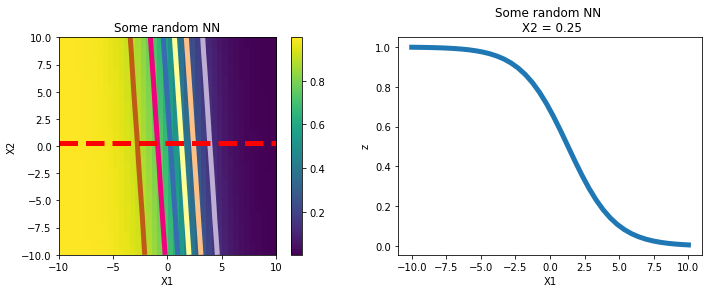

In [8]:
# Plot the result. 

## Take some random LR
w = np.random.uniform(-1,1,size=[1,2])
b = np.random.uniform(-1,1,size=[1,1])


## Generate the grid
n_points = 40  ## Number of points along each axis of the grid. 
xrange=np.linspace(-10,10,n_points)  ## We let the two features change from between -10 and 10 and we pick 40 points to sample.
X0,X1=np.meshgrid(xrange,xrange)
input_x = np.array([X0, X1]).T

z = np.array([log_reg_predict(x,w,b) for x in input_x]).reshape(n_points, n_points)

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(121, xlabel='X1', ylabel='X2', title='Some random NN')
plt.imshow(z,interpolation='nearest',origin='lower', extent=(-10,10,-10,10) , cmap=plt.cm.viridis )
plt.colorbar()
plt.contour(X0, X1, z, cmap = plt.cm.Accent, linewidths=5)
ax.axhline(y=.25, color='r', linestyle='--', linewidth=5)

ax = fig.add_subplot(122, xlabel='X1', ylabel='z', title='Some random NN \n X2 = 0.25')
ax.plot(X0[20], z[10], linewidth=5)

plt.show()
plt.close()

## Multi Class 
Consider the same problem, but with three classes instead of two. Now the computation graph would be like
![alt text](https://www.dropbox.com/s/jryr9f7udnxuetq/computationGraph_LR_simplified_multi_class.png?dl=1)
which means that there are three output nodes, one for the probability of each class. How would this work?

As we discussed in the first part of the course, we need to train three distinct estimators, one for each class. 

{ w<sub>1</sub>, b<sub>1</sub> } => Class 1

{ w<sub>2</sub>, b<sub>2</sub> } => Class 2

{ w<sub>3</sub>, b<sub>3</sub> } => Class 3

Just like before, each w<sub>i</sub> is a vector and each b<sub>i</sub> is a number. 

We can stack them together and make the matrix W with shape of (3,  n<sub>f</sub>) and 
 the matrix B with shape of (3, 1). The rest would be the same. In fact our implementation of the logistic regression would not require any modification.  

In [0]:
n_s = 100  # number of samples
n_outputs = 3
n_f= 2

x = np.random.uniform(-1,1,size=[n_s,n_f])
w = np.random.uniform(-1,1,size=[n_outputs,n_f])
b = np.random.uniform(-1,1,size=[1, n_outputs])
predicted_y = log_reg_predict(x,w,b)
predicted_y.shape


(100, 3)

## Multi Layer

Now consider the situation where two logistic regressions are compined to make a new estimator. 

That is, LR1 is applied to that innput features  and determine the probabilities of different classes. Then LR2 takes these probabilities as an input and based on that determine the probabilities of  a second classification problem. 
The computation graph would look like

![alt text](https://www.dropbox.com/s/9o01doidvs6hmj9/computationGraph_LR_simplified_multi_layer.png?dl=1)  
  
For charachterization of this estimator, we need two sets of W and B matrices, one for the LR1 and one for LR2. We use the following notation for that:

W<sup>[1]</sup> => Weights for LR1

B<sup>[1]</sup> => Biases for LR1

W<sup>[2]</sup> => Weights for LR1

W<sup>[2]</sup> => Biases for LR1

As discussed before, W<sup>[1]</sup> is 

{ w<sup>[1]</sup><sub>1</sub>, b<sub>1</sub> } => Class 1

{ w<sup>[1]</sup><sub>2</sub>, b<sub>2</sub> } => Class 2

{ w<sup>[1]</sup><sub>3</sub>, b<sub>3</sub> } => Class 3

So, each w<sup>[j]</sup><sub>i</sub> is a vector and each b<sup>[j]</sup><sub>i</sub> is a number and they correspond to classification of class i for LR_j. 

Use what we haev done so far to implement this! 

(Optional) Design your function such that it work for n_s samples. 

In [0]:
'''
This function can also be simply implemented using the function we have for a single unit of LR. 
'''

def NN_forward_function(X, w_list, b_list):
    ## We use the function log_reg_predict
    ## and one by one, proceed to the end 
    ## of the network. For each layer, we 
    ## use the outputs of the proceeding layer
    ## as input and then save the outputs in a. 
    a = []
    a += [X]
    for i in range(len(w_list)):
        a += [log_reg_predict(a[-1], w_list[i], b_list[i])]
  
    return a

def NN_forward(w_list, b_list):
    ## We want this to return a function of the NN feedforward operation. 
    def f(X, w_list, b_list):
        a = []
        a += [X]
        for i in range(len(w_list)):
            a += [log_reg_predict(a[-1], w_list[i], b_list[i])]
  
        return a

    return f

    

In [0]:
'''
Now let's make a random NN. 
'''
n_s = 100  # number of samples
n_outputs = 3
n_f = 2
n_l = [n_f, 5, 6, n_outputs ]  ### This is the number of nodes in each layer. 

x = np.random.uniform(-1,1,size=[n_s,n_f])
w_list = [ np.random.uniform(-1,1,size=[ n_l[i+1] , n_l[i] ] ) for i in range(len(n_l) - 1 )  ]
b_list = [ np.random.uniform(-1,1,size=[1, n_l[i+1]  ]) for i in range(len(n_l) - 1 )  ]

# [print(w.shape) for w in w_list]
# [print(w.shape) for w in b_list]

# predicted_y = log_reg_predict(x,w,b)
# predicted_y.shape
a = NN_forward_function(x, w_list, b_list)
a[-1].shape


(100, 3)

## Role of the Activation function

# Training a logistic regression

## Loss

In [10]:
'''
We need to define our loss function for training. 
We use the cross-entropy. 
'''

def cross_entropy(y, a):
    return -y*np.log(a)- (1-y)*np.log(1-a)


def cross_entropy_loss(y_list, x_list, w, bias=0):
                  
    ''' 
    First, you need to calculate the a = sig(z).
    Then calculate the loss using the equation for cross entropy. 
    
    '''
    n_sample = len(y_list)
    y_list = y_list.reshape(n_sample,1)
    
    z_list = ( np.dot(x_list, w.T ) + bias ).reshape( -1  , 1 )
    a_list = sigmoid( z_list )
    
    loss = cross_entropy(y_list, a_list).sum() / n_sample
    return loss

## ?? try a different loss function. 

SyntaxError: invalid syntax (<ipython-input-10-9ecf3d9d270f>, line 9)

In [0]:
w = np.random.uniform(-1,1,size=[1,2])
b = np.random.uniform(-1,1,size=[1,1])

predicted_y = log_reg_predict(x,w,b)

n_s=1000
x = np.random.uniform(-1,1,size=[n_s,2])
w_list = np.random.uniform(-20,20,size=[100, 1, 2])
ce_loss_list = [ cross_entropy_loss( predicted_y, x, w, b)  for w in w_list]


print(w_list.shape)


(100, 1, 2)


In [0]:
w_list[:,:,0].reshape(-1).shape

(100,)

The true parameters are 
 w=[[ 0.7613062  -0.58300925]] which is in dicated by the red point.


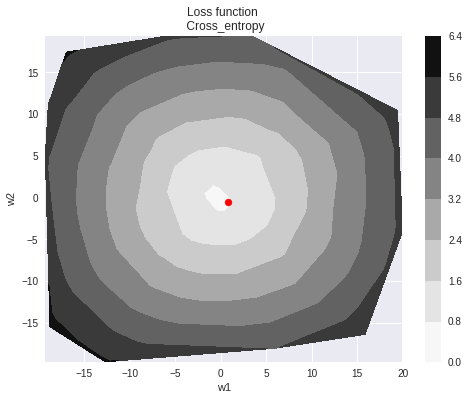

In [0]:
# ce_loss_list = [ cross_entropy_loss( predicted_y, x, w, b)  for w in w_list]


print('The true parameters are \n w={} which is in dicated by the red point.'.format(w.reshape(1,-1)))

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111,title = 'Loss function \n Cross_entropy', xlabel='w1', ylabel='w2')


p1 = ax1.tricontourf(w_list[:,:,0].reshape(-1),w_list[:,:,1].reshape(-1), ce_loss_list)
ax1.scatter(w[0,0], w[0,1], color='r')
plt.colorbar(p1, ax=ax1)



plt.show()

## Using an optimizer

In [0]:
from scipy.optimize import minimize
print('The true parameters are \n w = {}, \n and b = {}. '.format(w.reshape(1,-1)[0] , b[0,0]))

The true parameters are 
 w = [ 0.7613062  -0.58300925], 
 and b = -0.025999105893764973. 


In [2]:
w = np.random.uniform(-1,1,size=[1,2])
b = np.random.uniform(-1,1,size=[1,1])


In [0]:
min_w = minimize( (lambda w: cross_entropy_loss(predicted_y, x, np.array([ [w[0],w[1]] ]),w[2] )),[0,0, 0])
print('The optimized values are: w1, w2, b = {}'.format(min_w.x))

The optimized values are: w1, w2, b = [ 0.76129796 -0.58296354 -0.0260065 ]


## Step-by-Step GD for Logistic Regression

Now we want to do this ourselves, not using the optimizer. 

We will use a simple GD algorithm which basically does the following:

w_1  -> w_1 - alpha * dL/dw_1

w_2  -> w_2 - alpha * dL/dw_2

In [260]:
# def GD_step(w, b, db):

'''
Here we re-implement our function to abide by the new convention for 
the shape of x and w and b. 

x: (n_f, n_s)
w: (1, n_f)  
b: (1  , n_s) 
'''
def log_reg_predict(x, w, b ):
    return sigmoid( np.dot(w , x) + b )


def cross_entropy(y, a, noise = 0):
    y_in = y.reshape(-1)
    a_in = a.reshape(-1)
    n_s = len(y_in )
    return -np.dot( y_in, np.log(a_in+ noise*(1-y_in)  ).T )/n_s - np.dot((1-y_in),np.log( (1-a_in) + noise*y_in  ).T )/n_s    

In [197]:
n_f = 2
n_s = 1000   ## We need to have more that one sample if we want the optimization work well. 
ETA = .1  ## the Learning rate
noise = 10e-9

###Let's first start with 
w = np.random.uniform(-1,1,size=[1,2])
b = np.random.uniform(-1,1,size=[1,1])

## For some random inputs and the corresponding output
x = np.random.uniform(-1,1,size=[n_f, n_s])
y = (np.dot(w, x) + b)  > 0
y = y.astype(int)



In [198]:
## Now we initialize the optimization
w = np.random.uniform(-1,1,size=[1,2])
b = np.random.uniform(-1,1,size=[1,1])

w_list = [w]
b_list = [b]

loss_list = []

a = log_reg_predict(x,w,b)

loss_list += [cross_entropy(y, a, noise)]


In [199]:
## Calculate the derivatives
## See the notes for how these are calculated. 
dw = np.dot((a-y), x.T)
db = (( a-y ).sum()/n_s).reshape(-1,1)

## Let's check if the shapes are a match.
print(f"w is of the shape: {w.shape}.")
print(f"dw is of the shape: {dw.shape}.\n")

print(f"b is of the shape: {b.shape}.")
print(f"db is of the shape: {db.shape}.\n")



w is of the shape: (1, 2).
dw is of the shape: (1, 2).

b is of the shape: (1, 1).
db is of the shape: (1, 1).



In [200]:
### Now we update the weigts and bias. 
w -= ETA * dw
b -= ETA * db

a = log_reg_predict(x,w,b)

w_list += [w]
b_list += [b]

loss_list += [cross_entropy(y, a, noise)]


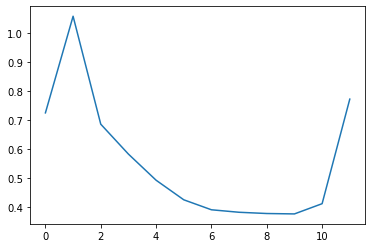

In [201]:
##Let's repeat this a few times. 
n_itr = 10  #number of iterations to repeat this. 

for i in range(n_itr):
    dw = np.dot((a-y), x.T)
    db = (( a-y ).sum()/n_s).reshape(-1,1)

    w -= ETA * dw
    b -= ETA * db

    a = log_reg_predict(x,w,b)

    w_list += [w]
    b_list += [b]

    loss_list += [cross_entropy(y, a, noise)]


plt.plot(loss_list)    

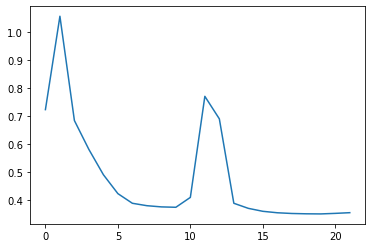

In [203]:
##Let's repeat this a few times. 
n_itr = 10  #number of iterations to repeat this. 
ETA = .05
for i in range(n_itr):
    dw = np.dot((a-y), x.T)
    db = (( a-y ).sum()/n_s).reshape(-1,1)

    w -= ETA * dw
    b -= ETA * db

    a = log_reg_predict(x,w,b)

    w_list += [w]
    b_list += [b]

    loss_list += [cross_entropy(y, a, noise)]


plt.plot(loss_list)    

# Full LR

In [480]:
'''
Now let's put it all into a function. 
Remember that the assumption is that 
x: (n_f, n_s)
w: (1, n_f)  
b: (1  , n_s) 

return_hist is to check if we want the history of changes in w and b. 
'''

def LR(w,b=0):
    def LR_f(x):
        return sigmoid(np.dot(w, x) + b)  
    return LR_f

def train_LR(X, Y, n_itr = 10, ETA = .1, return_hist = False, return_loss = False):
    n_f , n_s = X.shape
    
    w = np.random.uniform(-2,0,size=[1,n_f])
    
    b = np.random.uniform(1,3,size=[1,1])
    w_list = [w.copy()[0]]
    b_list = [b[0]]

    a = log_reg_predict(X,w,b)  

    loss_list = [cross_entropy(y, a, noise)]
    
    for i in range(n_itr):
#         print(w_list)
        dw = np.dot((a-y), x.T)
        db = (( a-y ).sum()/n_s).reshape(-1,1)

        w -= ETA * dw
        b -= ETA * db

        w_list += [w.copy()[0]]
        b_list += [b[0]]

        a = log_reg_predict(x,w,b)

        loss_list += [cross_entropy(y, a, noise)]

    output = [w[0], b[0]] + return_hist*[np.array(w_list), np.array(b_list)] + return_loss*[loss_list]
    return output

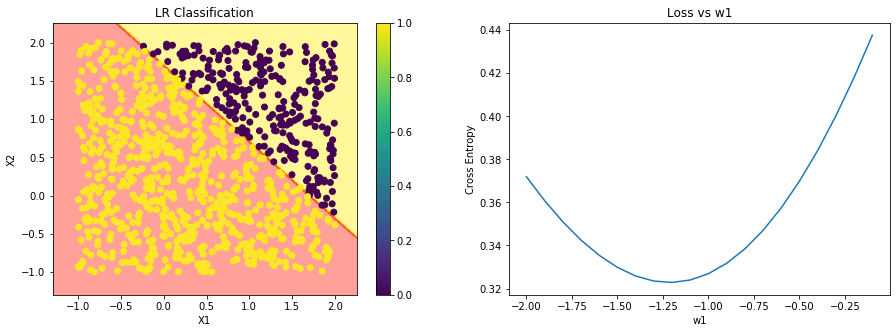

In [481]:
n_f = 2
n_s = 1000   ## We need to have more that one sample if we want the optimization work well. 
ETA = .1  ## the Learning rate
noise = 10e-8

###Let's test this on the example we did for the AND gate. 
w = np.array([-1, -1]).reshape(1,2)
b = np.array(1.7).reshape(1,1)

## Now we make the classifier function. 
LR_clf = LR(w,b)

## For some random inputs and the corresponding output
x = np.random.uniform(-1,2,size=[n_f, n_s])
y = LR_clf(x) > 0.5
y = y.astype(int).reshape(-1)


##Let's plot the result of this classifier. 
x1_list, x2_list = grid(x[0], x[1], n_points=70)
X_grid = np.vstack([x1_list.reshape(-1),x2_list.reshape(-1)])
Y_grid = LR_clf( X_grid ).reshape(x1_list.shape )>0.5

## Let's also take a look at the loss
w_list_1 = np.arange(-2,0,.1)
test_w_2, b = -1, 1.7
test_a = [LR([w1, test_w_2],b)(x) for w1 in w_list_1]
test_loss = [cross_entropy(y, a, noise) for a in test_a]

fig = plt.figure(figsize=(15,5))
plt.subplot(121, xlabel = "X1", ylabel = "X2", title = "LR Classification")
plt.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.autumn_r)
plt.scatter(*x, c=y.reshape(-1))
plt.colorbar()
plt.subplot(122, xlabel = "w1", ylabel = "Cross Entropy", title = "Loss vs w1" )
plt.plot(w_list_1 , test_loss)
plt.show()


In [482]:
w_, b_, w_h, b_h, losses  = train_LR(x,y,n_itr=100, ETA=.01, return_hist=True, return_loss=True)

In [483]:

w1_test_list = np.linspace(-3,1)
w2_test_list = np.linspace(-3,1)
n_pnts = len(w1_test_list)
w_test_grid  = np.array([[w1,w2] for w1 in w1_test_list for w2 in w1_test_list])
b_test = 1.7 
test_a = np.array([LR([w1, w2],b)(x) for w1 , w2 in w_test_grid  ])
test_loss = np.array([cross_entropy(y, a, noise) for a in test_a]).reshape(n_pnts, n_pnts)
test_loss.shape

(50, 50)

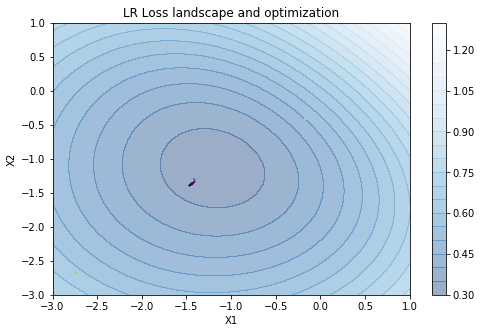

In [502]:
fig = plt.figure(figsize=(8,5))


ax = fig.add_subplot(111, xlabel = "X1", ylabel = "X2", title = "LR Loss landscape and optimization")

cf = ax.contourf(w_test_grid[:,0].reshape(50,50), 
             w_test_grid[:,1].reshape(50,50), 
             test_loss, 
                 levels = 20,#[.005,.01, .1, .2, .3, .4, .5, .7, 9],
                 alpha=.4, cmap=plt.cm.Blues_r)
ax.scatter(*w_h.T, c=losses, s= losses)
plt.colorbar(cf)

# plt.subplot(121, xlabel = "X1", ylabel = "X2", title = "X1")
# plt.scatter(*x)
# plt.plot(*w_h.T, marker='.', markersize = losses )

# plt.subplot(122, xlabel = "w1", ylabel = "Cross Entropy", title = "Loss vs w1" )
# plt.plot(w_list_1 , test_loss)
plt.show()

In [ ]:
'''
--> Add 3D plot: w1, w2, b  => size and color for the loss

--> Graph of the LR 

--> Animation for the optimization process

--> Turn thin into a class

--> Activation function: remove to see how it helps and works

--> Universality of the NN
'''